In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq

from matplotlib import pyplot as plt


In [41]:
from project import project_name

In [42]:
## Seaborn Theme Settings ##

sns.set_style('dark')
sns.set_palette('mako')

In [44]:
project_name

def df_query(sql):
    df = pandas_gbq.read_gbq(sql, project_id = project_name)

    return df

In [46]:
query = """
SELECT
  CASE WHEN trip_duration_min BETWEEN 0 AND 30 THEN '0 - 30'
    WHEN trip_duration_min BETWEEN 31 AND 60 THEN '30 - 60'
    WHEN trip_duration_min BETWEEN 61 AND 90 THEN '60 - 90'
    ELSE '> 90' END AS trip_bin,
  COUNT(*) AS trips
FROM chatt_bike_share.bike_trips
GROUP BY 1
ORDER BY 1;
"""

In [47]:
trip_duration_bins = df_query(query)

trip_duration_bins

Downloading: 100%|██████████|


,trip_bin,trips
0,0 - 30,346115
1,30 - 60,203634
2,60 - 90,37455
3,> 90,36265


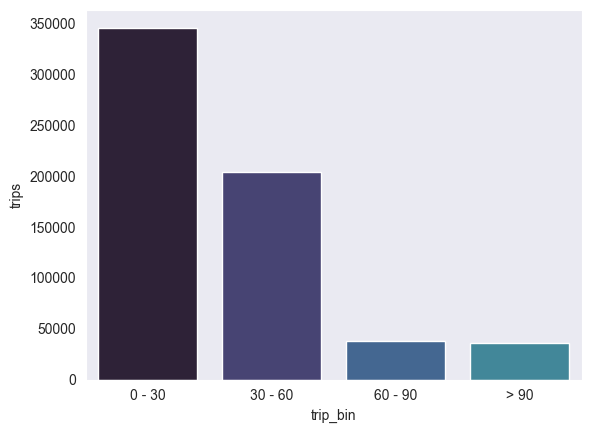

In [48]:
sns.barplot(
    data = trip_duration_bins,
    x = 'trip_bin',
    y = 'trips'
)

plt.show()